In [395]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.colors 

Training error for LDA=0.8600
Testing error for LDA=0.8625
Training error for QDA=0.8625
Testing error for QDA=0.8625
Training error = 0.8675 for K = 15
Testing error = 0.8625 for K = 15
Training error = 0.8775 for K = 5
Testing error = 0.8750 for K = 5


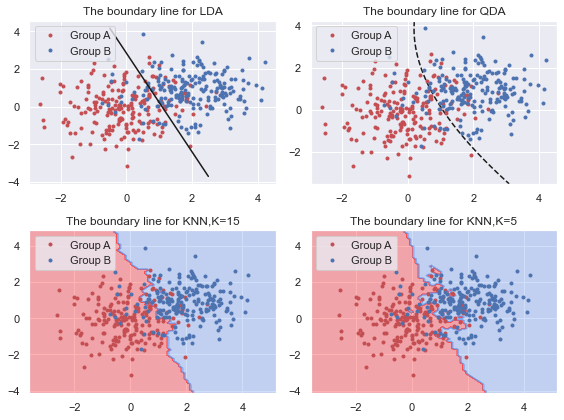

In [696]:
import numpy.linalg as LA
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([2, 1])
Cov1 = np.array([[1, 0], [0, 1]])
Cov2 = np.array([[1, 0], [0, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data_W51.txt", np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
#--------------------------
D = np.loadtxt('E:/統計應用/demo_data_W51.txt')
D_train,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
X = D[:, 0:2]
y = D[:,2]
C1, C2 = X[y==0,:], X[y==1,:]
fig = plt.figure(figsize=[8,6])
axs = fig.subplots(2, 2)
for i in range (2):
    for j in range (2):
        axs[i,j].plot(C1[:,0], C1[:,1], 'r.', label = 'Group A')
        axs[i,j].plot(C2[:,0], C2[:,1],'b.', label = 'Group B')
        axs[i,j].legend() 
       
# ----------Estimatr the group parameters------------
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2

#------直線函數估計與繪圖-----------
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2) \
@ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(-0.5, 2.5, 10)
axs[0,0].plot(x, f(x),'k')
axs[0,0].set_title('The boundary line for LDA')
#--------------錯判率--------------
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA_2=  Lda.score(X, y)
print('Training error for LDA={:.4f}'.format(MissClassRateLDA_2))
MissClassRateLDA_2=  Lda.score(D_test[:,0:2],D_test[:,2])
print('Testing error for LDA={:.4f}'.format(MissClassRateLDA_2))


#------QDA
Qda = QuadraticDiscriminantAnalysis(\
tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
contoursQDA = axs[0,1].contour(xx, yy, Z, [0.5],colors = 'k',linestyles='--')
axs[0,1].set_title('The boundary line for QDA')
MissClassRateQDA_2=  Qda.score(X,y)
print('Training error for QDA={:.4f}'.format(MissClassRateQDA_2))
MissClassRateQDA_2= Qda.score(D_test[:,0:2],D_test[:,2])
print('Testing error for QDA={:.4f}'.format(MissClassRateQDA_2))


#----KNN
K = 15
weights = 'uniform'
Knn = KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light = matplotlib.colors .ListedColormap(['red','cornflowerblue' ])
axs[1,0].contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
axs[1,0].set_title('The boundary line for KNN,K=%d'%K)
trainingErr=  Knn.score(X,y)
print('Training error = %.4f for K = %i' % (trainingErr,K))
testingErr= Knn.score(D_test[:,0:2],D_test[:,2])
print('Testing error = %.4f for K = %i' % (testingErr,K))

K = 5
weights = 'uniform'
Knn = KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light = matplotlib.colors .ListedColormap(['red','cornflowerblue' ])
axs[1,1].contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
axs[1,1].set_title('The boundary line for KNN,K=%d'%K)
trainingErr=  Knn.score(X,y)
print('Training error = %.4f for K = %i' % (trainingErr,K))
testingErr= Knn.score(D_test[:,0:2],D_test[:,2])
print('Testing error = %.4f for K = %i' % (testingErr,K))
fig.tight_layout()

Training error for LDA=0.7500
Testing error for LDA=0.7125
Training error for QDA=0.8800
Testing error for QDA=0.8625
Training error = 0.9025 for K = 3
Testing error = 0.8625 for K = 3
Training error = 0.8775 for K = 5
Testing error = 0.9000 for K = 5


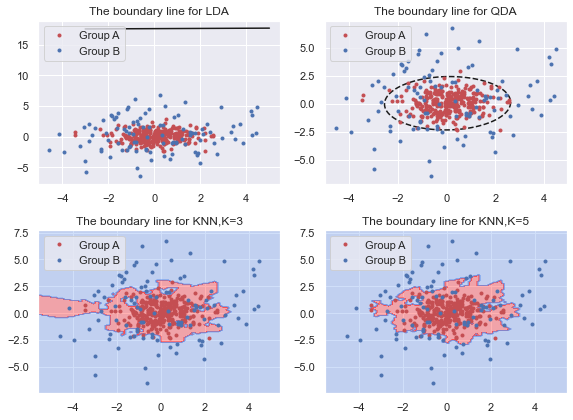

In [695]:
import numpy.linalg as LA
n1, n2 = 300, 100
m1, m2 = np.array([0, 0]), np.array([0, 0])
Cov1 = np.array([[1, 0.1], [0.1, 1]])
Cov2 = np.array([[6, 0.3], [0.3, 6]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data_W52.txt", np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
#---------------------------------------------------
D = np.loadtxt('E:/統計應用/demo_data_W52.txt')
D_train,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
X = D[:, 0:2]
y = D[:,2]
C1, C2 = X[y==0,:], X[y==1,:]
fig = plt.figure(figsize=[8,6])
axs = fig.subplots(2, 2)
for i in range (2):
    for j in range (2):
        axs[i,j].plot(C1[:,0], C1[:,1], 'r.', label = 'Group A')
        axs[i,j].plot(C2[:,0], C2[:,1],'b.', label = 'Group B')
        axs[i,j].legend() 
       
# ----------Estimatr the group parameters------------
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2

#------直線函數估計與繪圖-----------
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2) \
@ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(-3, 5, 10)
axs[0,0].plot(x, f(x),'k')
axs[0,0].set_title('The boundary line for LDA')
#--------------錯判率--------------
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA_2=  Lda.score(X, y)
print('Training error for LDA={:.4f}'.format(MissClassRateLDA_2))
MissClassRateLDA_2=  Lda.score(D_test[:,0:2],D_test[:,2])
print('Testing error for LDA={:.4f}'.format(MissClassRateLDA_2))


#------QDA
Qda = QuadraticDiscriminantAnalysis(\
tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
contoursQDA = axs[0,1].contour(xx, yy, Z, [0.5],colors = 'k',linestyles='--')
axs[0,1].set_title('The boundary line for QDA')
MissClassRateQDA_2=  Qda.score(X,y)
print('Training error for QDA={:.4f}'.format(MissClassRateQDA_2))
MissClassRateQDA_2= Qda.score(D_test[:,0:2],D_test[:,2])
print('Testing error for QDA={:.4f}'.format(MissClassRateQDA_2))


#----KNN
K = 3
weights = 'uniform'
Knn = KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light = matplotlib.colors .ListedColormap(['red','cornflowerblue' ])
axs[1,0].contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
axs[1,0].set_title('The boundary line for KNN,K=%d'%K)
trainingErr=  Knn.score(X,y)
print('Training error = %.4f for K = %i' % (trainingErr,K))
testingErr= Knn.score(D_test[:,0:2],D_test[:,2])
print('Testing error = %.4f for K = %i' % (testingErr,K))

K = 5
weights = 'uniform'
Knn = KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light = matplotlib.colors .ListedColormap(['red','cornflowerblue' ])
axs[1,1].contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
axs[1,1].set_title('The boundary line for KNN,K=%d'%K)
trainingErr=  Knn.score(X,y)
print('Training error = %.4f for K = %i' % (trainingErr,K))
testingErr= Knn.score(D_test[:,0:2],D_test[:,2])
print('Testing error = %.4f for K = %i' % (testingErr,K))
fig.tight_layout()


c:\Users\user\anaconda3\lib\site-packages\scipy\stats\_multivariate.py:666: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


Training error for LDA=0.5250
Testing error for LDA=0.5375
Training error for QDA=0.8250
Testing error for QDA=0.8000
Training error = 0.8075 for K = 15
Testing error = 0.7625 for K = 15
Training error = 0.8425 for K = 5
Testing error = 0.8000 for K = 5


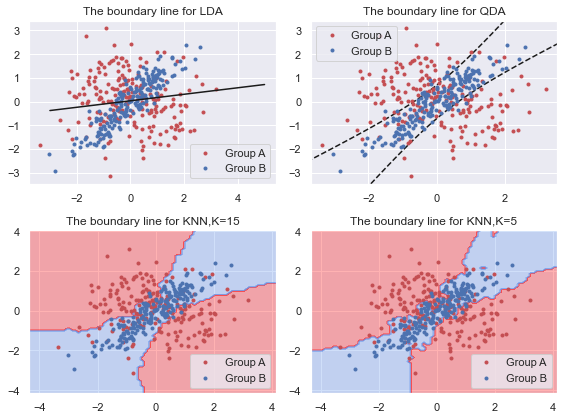

In [698]:
import numpy.linalg as LA
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([0, 0])
Cov1 = np.array([[1, -0.9], [0.9, 1]])
Cov2 = np.array([[1, 0.9], [0.9, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data_W53.txt", np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
#---------------------------------------------------
D = np.loadtxt('E:/統計應用/demo_data_W53.txt')
D_train,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
X = D[:, 0:2]
y = D[:,2]
C1, C2 = X[y==0,:], X[y==1,:]
fig = plt.figure(figsize=[8,6])
axs = fig.subplots(2, 2)
for i in range (2):
    for j in range (2):
        axs[i,j].plot(C1[:,0], C1[:,1], 'r.', label = 'Group A')
        axs[i,j].plot(C2[:,0], C2[:,1],'b.', label = 'Group B')
        axs[i,j].legend() 
       
# ----------Estimatr the group parameters------------
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2

#------直線函數估計與繪圖-----------
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2) \
@ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(-3, 5, 10)
axs[0,0].plot(x, f(x),'k')
axs[0,0].set_title('The boundary line for LDA')
#--------------錯判率--------------
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA_2=  Lda.score(X, y)
print('Training error for LDA={:.4f}'.format(MissClassRateLDA_2))
MissClassRateLDA_2=  Lda.score(D_test[:,0:2],D_test[:,2])
print('Testing error for LDA={:.4f}'.format(MissClassRateLDA_2))


#------QDA
Qda = QuadraticDiscriminantAnalysis(\
tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
contoursQDA = axs[0,1].contour(xx, yy, Z, [0.5],colors = 'k',linestyles='--')
axs[0,1].set_title('The boundary line for QDA')
MissClassRateQDA_2=  Qda.score(X,y)
print('Training error for QDA={:.4f}'.format(MissClassRateQDA_2))
MissClassRateQDA_2= Qda.score(D_test[:,0:2],D_test[:,2])
print('Testing error for QDA={:.4f}'.format(MissClassRateQDA_2))


#----KNN
K = 15
weights = 'uniform'
Knn = KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light = matplotlib.colors .ListedColormap(['red','cornflowerblue' ])
axs[1,0].contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
axs[1,0].set_title('The boundary line for KNN,K=%d'%K)
trainingErr=  Knn.score(X,y)
print('Training error = %.4f for K = %i' % (trainingErr,K))
testingErr= Knn.score(D_test[:,0:2],D_test[:,2])
print('Testing error = %.4f for K = %i' % (testingErr,K))

K = 5
weights = 'uniform'
Knn = KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light = matplotlib.colors .ListedColormap(['red','cornflowerblue' ])
axs[1,1].contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
axs[1,1].set_title('The boundary line for KNN,K=%d'%K)
trainingErr=  Knn.score(X,y)
print('Training error = %.4f for K = %i' % (trainingErr,K))
testingErr= Knn.score(D_test[:,0:2],D_test[:,2])
print('Testing error = %.4f for K = %i' % (testingErr,K))
fig.tight_layout()

Training error for LDA=0.5800
Testing error for LDA=0.6000
Training error for QDA=0.8475
Testing error for QDA=0.8375
Training error = 0.8625 for K = 15
Testing error = 0.8875 for K = 15
Training error = 0.8800 for K = 5
Testing error = 0.8625 for K = 5


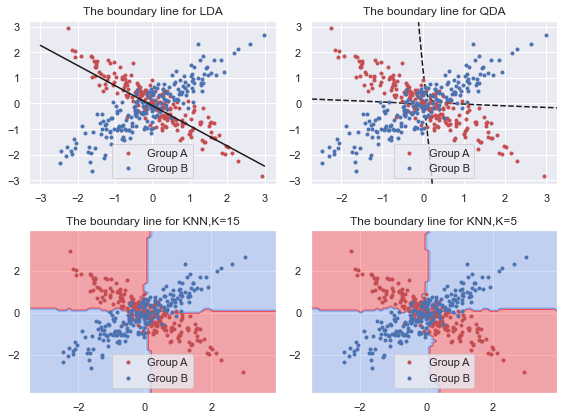

In [699]:
import numpy.linalg as LA
n1, n2 = 200, 200
m1, m2 = np.array([0, 0]), np.array([0, 0])
Cov1 = np.array([[1, -0.9], [-0.9, 1]])
Cov2 = np.array([[1, 0.9], [0.9, 1]])
mvn1 = multivariate_normal(mean = m1, cov = Cov1)
mvn2 = multivariate_normal(mean = m2, cov = Cov2)
A, B = mvn1.rvs(n1), mvn2.rvs(n2)
X = np.vstack((A, B))
y = np.hstack((np.zeros(n1), np.ones(n2)))
np.savetxt("demo_data_W54.txt", np.c_[X, y],\
fmt = "%.4f %.4f %d", header = "X1 X2 y")
#---------------------------------------------------
D = np.loadtxt('E:/統計應用/demo_data_W54.txt')
D_train,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
X = D[:, 0:2]
y = D[:,2]
C1, C2 = X[y==0,:], X[y==1,:]
fig = plt.figure(figsize=[8,6])
axs = fig.subplots(2, 2)
for i in range (2):
    for j in range (2):
        axs[i,j].plot(C1[:,0], C1[:,1], 'r.', label = 'Group A')
        axs[i,j].plot(C2[:,0], C2[:,1],'b.', label = 'Group B')
        axs[i,j].legend() 
       
# ----------Estimatr the group parameters------------
n = D[:,0].size
n1, n2 = C1[:,0].size, C2[:,0].size
pi1, pi2 = n1/n, n2/n
mu1, mu2 = np.mean(C1, axis = 0), np.mean(C2, axis = 0)
Sigma = (np.cov(C1.T) + np.cov(C2.T))/2

#------直線函數估計與繪圖-----------
K = np.log(pi1/pi2) - 0.5 * (mu1 + mu2) \
@ LA.inv(Sigma) @ (mu1 - mu2).T
L = LA.inv(Sigma) @ (mu1 - mu2).T
f = lambda x : -L[0]/L[1] * x - K/L[1]
x = np.linspace(-3, 3, 10)
axs[0,0].plot(x, f(x),'k')
axs[0,0].set_title('The boundary line for LDA')
#--------------錯判率--------------
Lda = LinearDiscriminantAnalysis(tol = 1e-6)
Lda.fit(X, y)
K = Lda.intercept_
L = Lda.coef_
MissClassRateLDA_2=  Lda.score(X, y)
print('Training error for LDA={:.4f}'.format(MissClassRateLDA_2))
MissClassRateLDA_2=  Lda.score(D_test[:,0:2],D_test[:,2])
print('Testing error for LDA={:.4f}'.format(MissClassRateLDA_2))


#------QDA
Qda = QuadraticDiscriminantAnalysis(\
tol = 1e-6, store_covariance = True)
Qda.fit(X, y)
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
x_ = np.linspace(x_min, x_max, nx)
y_ = np.linspace(y_min, y_max, ny)
xx, yy = np.meshgrid(x_, y_)
Z = Qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
contoursQDA = axs[0,1].contour(xx, yy, Z, [0.5],colors = 'k',linestyles='--')
axs[0,1].set_title('The boundary line for QDA')
MissClassRateQDA_2=  Qda.score(X,y)
print('Training error for QDA={:.4f}'.format(MissClassRateQDA_2))
MissClassRateQDA_2= Qda.score(D_test[:,0:2],D_test[:,2])
print('Testing error for QDA={:.4f}'.format(MissClassRateQDA_2))


#----KNN
K = 15
weights = 'uniform'
Knn = KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light = matplotlib.colors .ListedColormap(['red','cornflowerblue' ])
axs[1,0].contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
axs[1,0].set_title('The boundary line for KNN,K=%d'%K)
trainingErr=  Knn.score(X,y)
print('Training error = %.4f for K = %i' % (trainingErr,K))
testingErr= Knn.score(D_test[:,0:2],D_test[:,2])
print('Testing error = %.4f for K = %i' % (testingErr,K))

K = 5
weights = 'uniform'
Knn = KNeighborsClassifier(K, weights = weights)
Knn.fit(X, y)
trainingErr = 1 - Knn.score(X, y)
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),\
np.arange(y_min, y_max, 0.1))
z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = z.reshape(xx.shape)
cmap_light = matplotlib.colors .ListedColormap(['red','cornflowerblue' ])
axs[1,1].contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
axs[1,1].set_title('The boundary line for KNN,K=%d'%K)
trainingErr=  Knn.score(X,y)
print('Training error = %.4f for K = %i' % (trainingErr,K))
testingErr= Knn.score(D_test[:,0:2],D_test[:,2])
print('Testing error = %.4f for K = %i' % (testingErr,K))
fig.tight_layout()

In [726]:
rng=np.random.default_rng(123)
def generate_function(n1, n2,n3, mu1, mu2,mu3, cov1, cov2,cov3):
    mvn1 = multivariate_normal(mean = mu1, cov = cov1)
    mvn2 = multivariate_normal(mean = mu2, cov = cov2)
    mvn3 = multivariate_normal(mean = mu3, cov = cov3)
    A,B,C=mvn1.rvs(n1,random_state=rng),mvn2.rvs(n2,random_state=rng),mvn3.rvs(n3,random_state=rng)
    X = np.vstack((A, B ,C)) #疊起來
    twos=np.zeros(n3)
    for i in range(100):
      twos[i] = 2
    y = np.hstack((np.zeros(n1),np.ones(n2),twos))
    return X, y
#LDA------------
def lda(D,X,y,axs):
    #_, ax = plt.subplots(figsize=(6, 4))
    Lda = LinearDiscriminantAnalysis(tol = 1e-6)
    Lda.fit(X, y)
    D_trian,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
    MissClassRateLDA_2=  Lda.score(X, y)
    print('Training error for LDA={:.4f}'.format(MissClassRateLDA_2))
    MissClassRateLDA_2=  Lda.score(D_test[:,0:2],D_test[:,2])
    print('Testing error for LDA={:.4f}'.format(MissClassRateLDA_2))

    C1, C2,C3 = X[y==0,:], X[y==1,:],X[y==2,:]
    axs.plot(C1[:,0], C1[:,1], 'r>', label = 'Group A')
    axs.plot(C2[:,0], C2[:,1],'b<', label = 'Group B')
    axs.plot(C3[:,0], C3[:,1],'g^', label = 'Group C')
    axs.legend()

    nx, ny = 200, 100
    x_min, x_max = axs.set_xlim()
    y_min, y_max = axs.set_ylim()
    x_ = np.linspace(x_min, x_max, nx)
    y_ = np.linspace(y_min, y_max, ny)
    xx, yy = np.meshgrid(x_, y_)
    x1, x2 = xx.ravel(), yy.ravel()
    zz = Lda.predict(np.c_[x1, x2])

    colors =['#F2CBCB', '#CBEFF2','#B4EEB4']
    for i in range(3) :
        axs.scatter(x1[zz==i], x2[zz==i], marker='.',
        color=colors[i])

    axs.grid(True)
    axs.set_title('The pseudo colors for LDA')
    #axs.show()
#QDA------------
def qda(D,X,y,axs):
    #_, ax = plt.subplots(figsize=(6, 4))
    C1, C2,C3 = X[y==0,:], X[y==1,:],X[y==2,:]
    axs.plot(C1[:,0], C1[:,1], 'r>', label = 'Group A')
    axs.plot(C2[:,0], C2[:,1],'b<', label = 'Group B')
    axs.plot(C3[:,0], C3[:,1],'g^', label = 'Group C')
    axs.legend()
    
    D_trian,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
    Qda = QuadraticDiscriminantAnalysis(tol = 1e-6, store_covariance = True)
    Qda.fit(X,y)
    MissClassRateQDA_2=  Qda.score(X,y)
    print('Training error for QDA={:.4f}'.format(MissClassRateQDA_2))
    MissClassRateQDA_2= Qda.score(D_test[:,0:2],D_test[:,2])
    print('Testing error for QDA={:.4f}'.format(MissClassRateQDA_2))

    nx, ny = 200, 100
    x_min, x_max = axs.set_xlim()
    y_min, y_max = axs.set_ylim()
    x_ = np.linspace(x_min, x_max, nx)
    y_ = np.linspace(y_min, y_max, ny)
    xx, yy = np.meshgrid(x_, y_)
    x1, x2 = xx.ravel(), yy.ravel()
    zz = Qda.predict(np.c_[x1, x2])

    colors =['#F2CBCB', '#CBEFF2','#B4EEB4']
    for i in range(3) :
        axs.scatter(x1[zz==i], x2[zz==i], marker='.',
        color=colors[i])

    axs.grid(True)
    axs.set_title('The pseudo colors for QDA')
    #axs.show()
def knn(D,y,X,k,axs):
    n = len(y)
    y = D[:,2].astype('int') # convert to integers
    D_trian,D_test= train_test_split(D,test_size=0.2,train_size=0.8)
    cmap_bold = ['darkblue', 'darkorange','red']
    Group_name = np.array(['Group A', 'Group B','Group C'])
    #axs.figure(figsize=(8, 6))
    sns.scatterplot(ax=axs,x = X[:, 0], y = X[:, 1], \
    hue = Group_name[y], palette = cmap_bold, alpha = 0.9, edgecolor = 'black')

    # ------KNN learning-------
    K = k
    intrvl = 0.2 # grid interval
    x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
    y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, intrvl), \
    np.arange(y_min, y_max, 0.1)) # grid points: matrices
    z = np.zeros(xx.size) # a vector for KNN predictions
    weights = 'uniform'
    Knn = KNeighborsClassifier(K, weights = weights)
    Knn.fit(X, y)
    trainingErr =  Knn.score(X, y)
    z = Knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = z.reshape(xx.shape)
    cmap_light = matplotlib.colors .ListedColormap(['blue', 'orange','red'])
    axs.contourf(xx, yy, Z, cmap = cmap_light, alpha = 0.3)
    print(('Training error = %.4f for K = %i' % (trainingErr,K)))
    testingErr =  Knn.score(D_test[:,0:2],D_test[:,2])
    print('Testing error = %.4f for K = %i' % (testingErr,K))
    axs.set_title('The pseudo colors and boundary line for KNN,K=%d'%K)
    #plt.show()

Training error for LDA=0.9883
Testing error for LDA=1.0000
Training error for QDA=0.9900
Testing error for QDA=0.9833
Training error = 0.9900 for K = 5
Testing error = 0.9917 for K = 5
Training error = 0.9933 for K = 15
Testing error = 0.9917 for K = 15


<ipython-input-735-ec0c73b693d2>:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


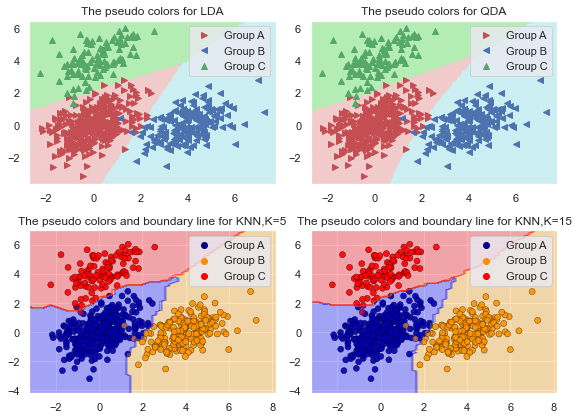

In [735]:
n1,n2,n3 = 300,200,100
n = [300,200,100]
mu1,mu2,mu3 = np.array([0, 0]), np.array([4, 0]),np.array([0, 4])
cov1 = np.array([[1, 0.5], [0.5, 1]])
cov2 = np.array([[1, 0.5], [0.5, 1]])
cov3 = np.array([[1, 0.5], [0.5, 1]])

X,y = generate_function(n1,n2,n3,mu1,mu2,mu3,cov1,cov2,cov3)
np.savetxt('QDA_1.txt', np.c_[X, y],fmt = "%.4f %.4f %d")
data_dir = 'E:/統計應用/'
D = np.loadtxt(data_dir + 'QDA_1.txt', comments='%')

fig = plt.figure(figsize=[8,6])
axs = fig.subplots(2, 2)
lda(D,X,y,axs[0,0])
qda(D,X,y,axs[0,1])
knn(D,y,X,5,axs[1,0])
knn(D,y,X,15,axs[1,1])
fig.tight_layout()

c:\Users\user\anaconda3\lib\site-packages\scipy\stats\_multivariate.py:666: RuntimeWarning: covariance is not positive-semidefinite.
  out = random_state.multivariate_normal(mean, cov, size)


Training error for LDA=0.5629
Testing error for LDA=0.6429
Training error for QDA=0.6486
Testing error for QDA=0.6429
Training error = 0.8657 for K = 3
Testing error = 0.8857 for K = 3
Training error = 0.7543 for K = 10
Testing error = 0.7000 for K = 10


<ipython-input-736-60b5bfa9341e>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


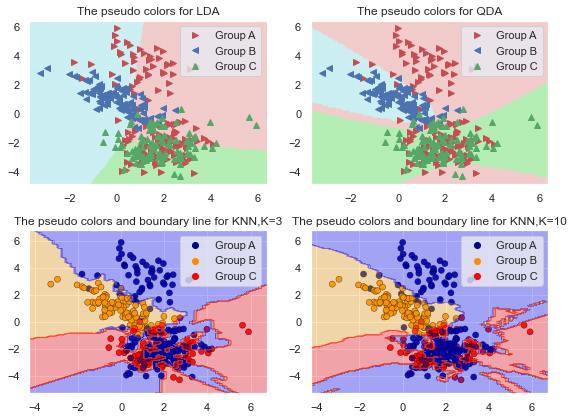

In [736]:
n1,n2,n3 = 50,100,200
n = [100,50,200]
mu1,mu2,mu3 = np.array([1, 3]), np.array([0, 1]),np.array([2, -2])
cov1 = np.array([[0.9, -0.8], [0.9, 1]])
cov2 = np.array([[1, -0.8], [-0.6, 0.8]])
cov3 = np.array([[0.9, -0.2], [0.5, 0.8]])

X,y = generate_function(n1,n2,n3,mu1,mu2,mu3,cov1,cov2,cov3)
np.savetxt('QDA_2.txt', np.c_[X, y],fmt = "%.4f %.4f %d")
data_dir = 'E:/統計應用/'
D = np.loadtxt(data_dir + 'QDA_2.txt', comments='%')
fig = plt.figure(figsize=[8,6])
axs = fig.subplots(2, 2)
lda(D,X,y,axs[0,0])
qda(D,X,y,axs[0,1])
knn(D,y,X,3,axs[1,0])
knn(D,y,X,10,axs[1,1])
fig.tight_layout()
fig.show()

Training error for LDA=0.5714
Testing error for LDA=0.6143
Training error for QDA=0.7286
Testing error for QDA=0.7857
Training error = 0.8057 for K = 3
Testing error = 0.7714 for K = 3
Training error = 0.7743 for K = 5
Testing error = 0.7429 for K = 5


<ipython-input-783-d3a93279f21a>:19: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


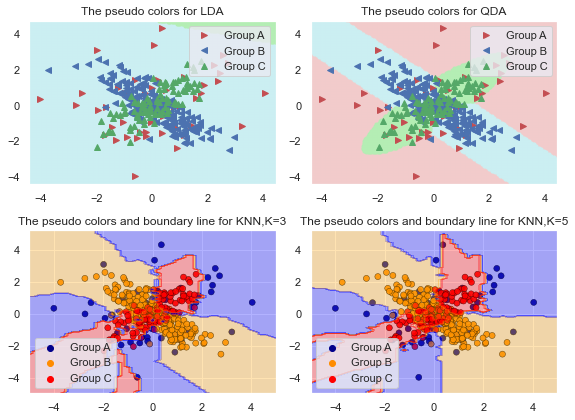

In [783]:
n1,n2,n3 = 50,200,100
n = [50, 200 ,100]
mu1,mu2,mu3 = np.array([0, 0]), np.array([0, 0]),np.array([0,0])
cov1 = np.array([[3, 0.1], [0.1, 3]])
cov2 = np.array([[1, -0.8], [-0.8, 1]])
cov3 = np.array([[1, 0.8], [0.8, 1]])

X,y = generate_function(n1,n2,n3,mu1,mu2,mu3,cov1,cov2,cov3)
np.savetxt('QDA_3.txt', np.c_[X, y],fmt = "%.4f %.4f %d")
data_dir = 'E:/統計應用/'
D = np.loadtxt(data_dir + 'QDA_3.txt', comments='%')
fig = plt.figure(figsize=[8,6])
axs = fig.subplots(2, 2)
lda(D,X,y,axs[0,0])
qda(D,X,y,axs[0,1])
knn(D,y,X,3,axs[1,0])
knn(D,y,X,5,axs[1,1])
fig.tight_layout()
fig.show()